In [26]:
import matplotlib.pyplot as plt
import numpy as np
from pytorch_lightning import seed_everything
from numpy.lib.stride_tricks import sliding_window_view
import itertools
import random

seed_everything(42, workers=True)

def create_dataset():
    seed_everything(42, workers=True)

    size = 1000
    # np.random.seed(42)
    # random.seed(42)
    x1  = np.zeros(size)
    x2  = np.zeros(size)
    x3  = np.zeros(size)
    x4  = np.zeros(size)
    x5  = np.zeros(size)

    x1_seq = np.array([1,2,3])

    # embed sequence randomly several times in  x1. overlap is ok.
    for i in random.sample(range(0, len(x1)-len(x1_seq)), 75):
        x1[i:i+len(x1_seq)] = x1_seq

    # Define the numbers and the maximum length of the noise sequences
    numbers = [0, 1, 2, 3]
    max_length = 3

    # Generate all possible sequences of lengths 1 to max_length
    all_sequences = [seq for i in range(1, max_length + 1) for seq in itertools.product(numbers, repeat=i)]

    # Convert to numpy arrays and filter out the (1, 2, 3) sequence
    noise_sequences = [np.array(seq) for seq in all_sequences if seq != (1, 2, 3)]

    # Number of times to embed noise
    num_noise_embeddings = 50

    # Randomly embed noise sequences
    for _ in range(num_noise_embeddings):
        # Choose a random noise sequence
        noise_seq = random.choice(noise_sequences)
        # Choose a random start position; overlap is ok
        start_pos = random.randint(0, len(x1) - len(noise_seq))
        # Embed the noise sequence
        x1[start_pos:start_pos+len(noise_seq)] = noise_seq

    #### X2 ####
    # x2 responds to x1 and has the unique value of 5.  The response is 2 indexs after x1 produces 1,2,3. 
    responsetime = 2
    for i in range(len(x1) - (len(x1_seq) + responsetime)):
        if np.array_equal(x1[i:i+len(x1_seq)], x1_seq):
            s = i + len(x1_seq) + responsetime # start at the end of the sequence and add the response time
            x2[s] = 5

    #### X3 ####
    # second source
    x3_seq = np.array([4, 3, 2])

    # Embed x3_seq randomly in x3, allowing overlaps.
    for i in random.sample(range(0, len(x3) - len(x3_seq)), 75):
        x3[i:i+len(x3_seq)] = x3_seq

    # Generate noise for x3, similar to x1, excluding the sequence [4, 3, 2].
    numbers = [0, 1, 2, 3, 4]  # Including 4 since it's part of x3's unique sequence.
    max_length = 3
    all_sequences = [seq for i in range(1, max_length + 1) for seq in itertools.product(numbers, repeat=i)]
    noise_sequences = [np.array(seq) for seq in all_sequences if seq != tuple(x3_seq)]
    num_noise_embeddings = 50

    for _ in range(num_noise_embeddings):
        noise_seq = random.choice(noise_sequences)
        start_pos = random.randint(0, len(x3) - len(noise_seq))
        x3[start_pos:start_pos+len(noise_seq)] = noise_seq

    #### X4 ####
    # x4 responds to x3 with the sequence [3, -3] two indices after [4, 3, 2].
    responsetime = 5
    for i in range(len(x3) - (len(x3_seq) + responsetime+1)):
        if np.array_equal(x3[i:i+len(x3_seq)], x3_seq):
            s = i + len(x3_seq) + responsetime # start at the end of the sequence and add the response time
            x4[s] = 3
            x4[s+1] = -3

    #### X5 ####
    # x5 is abs inverted x3
    x5 = -x3

    data = np.array([x1, x2, x3, x4, x5]).T

    return data
    

Global seed set to 42


In [27]:
data = create_dataset()

Global seed set to 42


In [28]:
context = 10
target = 1

window_shape = (context+target, data.shape[1])
step = 1  # Step size

# Use sliding_window_view
windows = sliding_window_view(data, window_shape=window_shape)[::step].squeeze()

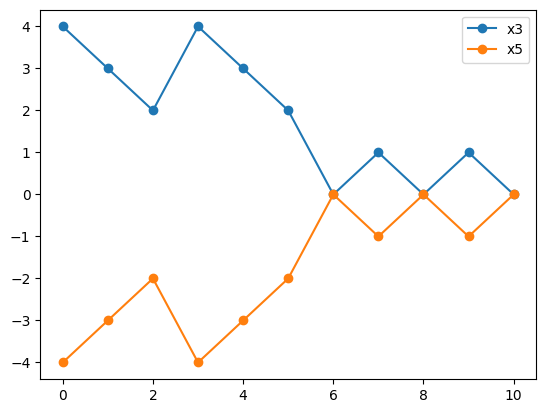

In [29]:
# plt.plot(windows[0,:,0],marker='o', label='x1')
# plt.plot(windows[0,:,1],marker='o', label='x2')
plt.plot(windows[0,:,2],marker='o', label='x3')
# plt.plot(windows[0,:,3],marker='o', label='x4')
plt.plot(windows[0,:,4],marker='o', label='x5')
plt.legend()